# Advanced Text Analytics Lab 1

This notebook is the first of two lab notebooks that you will submit as part of your assessment for the Advanced Data Analytics unit. 

This notebook is contains three sections:
1. **Word embeddings:** This will introduce you to loading and training word embeddings using the Gensim library.
2. **Introducing neural text classifiers:** Here we show you how to construct a neural network text classifier for sentiment analysis using Pytorch. 
3. **Improving neural text classifiers:** This section gives you a chance to improve the classifier from the previous section by applying what we have learned in the lectures.

## Learning Outcomes

These sections will contain tutorial-like instructions, as you have seen in previous text analytics labs. On completing these sections, the intended learning outcomes are that you will be able to...
1. Load pretrained word embeddings models.
1. Learn word embeddings from an unlabelled dataset.
1. Recognise the steps required to train and test a neural text classifier with Pytorch
1. Adapt the architecture of a neural text classifier.

## Getting Started -- Python Packages

Please see the README.md file for instructions on setting up your Python environment. The readme will instruct you to install the required packages, in addition to those used for Introduction to Data Analytics:

 * pytorch=1.9.0
 * scipy=1.8.0
 * transformers=2.1.1

## Your Tasks

Inside each of these sections there are several **'To-do's**, which you must complete for your summative assessment. Your marks will be based on your answers to these to-dos. Please make sure to:
1. Include the output of your code in the saved notebook. Plots and printed output should be visible without re-running the code. 
1. Include all code needed to generate your answers.
1. Provide sufficient comments to understand how your method works.
1. Write text in a cell in markdown format where a written answer is required. You can convert a cell to markdown format by pressing Escape-M. 

There are also some unmarked 'to-do's that are part of the tutorial to help you learn how to implement and use the methods studied here. These do not contribute to your final marks.

## Good Academic Practice

Please follow [the guidance on academic integrity provided by the university](http://www.bristol.ac.uk/students/support/academic-advice/academic-integrity/).
You are required to write your own answers -- do not share your notebooks or copy someone else's writing. Do not copy text or long blocks of code directly into the notebook from online sources -- always rewrite in your own way. Breaking the rules can lead to strong penalties. 

## Marking Criteria

1. The coursework (both notebooks) is worth 30% of the unit in total. 
1. There is a total of 100 marks available for both lab notebooks. 
1. This notebook is worth 50 of those marks.
1. The number of marks for each to-do out of 100 is shown alongside each to-do.
1. For to-dos that require you to write code, a good solution would meet the following criteria (in order of importance):
   1. Solves the task or answers the question asked in the to-do. This means, if the code cells in the notebook are executed in order, we will get the output shown in your notebook.
   1. The code is easy to follow and does not contain unnecessary steps.
   1. The comments show that you understand how your solution works.
   1. A very good answer will also provide code that is computationally efficient but easy to read.
1. You can use any suitable publicly available libraries. Unless the task explicitly asks you to implement something from scratch, there is no penalty for using libraries to implement some steps.

## Support

The main source of support will be during the remaining lab sessions (Fridays 3-6pm) for this unit. 

The TAs and lecturer will help you with questions about the lectures, the code provided for you in this notebook, and general questions about the topics we cover. For the marked 'to-dos', they can only answer clarifying questions about what you have to do. 

Office hours: You can book office hours with Edwin on Mondays 3pm-5pm by sending him an email (edwin.simpson@bristol.ac.uk). If those times are not possible for you, please contact him by email to request an alternative. 

## Deadline

The notebook must be submitted along with the second notebook on Blackboard before **Wednesday 24th May at 13.00**. 

## Submission

You will need to zip up this notebook and the next notebook into a single .zip file, which you will submit to Blackboard through the 'assessment, submission and feedback' link on the left sidebar. 

Please name your files like this:
   * Name this notebook ADA1_<student_number>.ipynb
   * Name the zip file <student_number>.zip
   * Please don't include your name as we want to mark anonymously to ensure fairness. 

# 1. Word Embeddings (max. 12 marks)

In this section we will use both sparse vectors and dense word2vec embeddings to obtain
vector representations of words and documents. 

First, we will load the `tweet eval` sentiment dataset.

In [1]:
import numpy as np
import torch


In [2]:
from datasets import load_dataset
from tqdm import tqdm
from sklearn.feature_extraction.text import CountVectorizer

cache_dir = "./data_cache"

train_dataset = load_dataset(
    "tweet_eval",
    name="sentiment",
    split="train",
    ignore_verifications=True,
    cache_dir=cache_dir,
)

print(f"Training dataset with {len(train_dataset)} instances loaded")


dev_dataset = load_dataset(
    "tweet_eval",
    name="sentiment",
    split="validation",
    ignore_verifications=True,
    cache_dir=cache_dir,
)

print(f"Development/validation dataset with {len(dev_dataset)} instances loaded")


test_dataset = load_dataset(
    "tweet_eval",
    name="sentiment",
    split="test",
    ignore_verifications=True,
    cache_dir=cache_dir,
)

print(f"Test dataset with {len(test_dataset)} instances loaded")

# Put the data into lists ready for the next steps...
train_texts = []
train_labels = []
for i in tqdm(range(len(train_dataset))):
    train_texts.append(train_dataset[i]['text'])
    train_labels.append(train_dataset[i]['label'])
            
# HINT: A count vectorizer object may be useful in later steps
vectorizer = CountVectorizer()
vectorizer.fit(train_texts)

# Get the vocabulary
vocab = vectorizer.vocabulary_
vocab_size = len(vocab)
print(f'The vocabulary has {vocab_size} words')

# invert the vocabulary dictionary so we can look up word types given an index
keys = vocab.values()
values = vocab.keys()
vocab_inverted = dict(zip(keys, values))

print(f'Index of "love" is {vocab["love"]}')

Reusing dataset tweet_eval (./data_cache/tweet_eval/sentiment/1.1.0/12aee5282b8784f3e95459466db4cdf45c6bf49719c25cdb0743d71ed0410343)


Training dataset with 45615 instances loaded


Reusing dataset tweet_eval (./data_cache/tweet_eval/sentiment/1.1.0/12aee5282b8784f3e95459466db4cdf45c6bf49719c25cdb0743d71ed0410343)


Development/validation dataset with 2000 instances loaded


Reusing dataset tweet_eval (./data_cache/tweet_eval/sentiment/1.1.0/12aee5282b8784f3e95459466db4cdf45c6bf49719c25cdb0743d71ed0410343)


Test dataset with 12284 instances loaded


100%|██████████████████████████████████| 45615/45615 [00:02<00:00, 19783.67it/s]


The vocabulary has 43358 words
Index of "love" is 22981


## 1.1. Term-Document Matrix

First we are going to obtain sparse word vectors from a term-document matrix.

**TO-DO 1a:** Use CountVectorizer to obtain a term-document matrix for the training set. Then, write a function that takes a word as an argument and returns its term vector from the term-document matrix you computed. Get the term vector for the word 'love'. **(4 marks)**

In [3]:
# WRITE YOUR ANSWER HERE
#transforming the train_texts training data into a term document matrix using the vectorizer.transform function.
term_document_matrix = vectorizer.transform(train_texts)

#function that takes a word as a parameter(argument) and returns its term vector from term_document_matrix.
def get_term_vector(word):
    #getting the index of the word in the vocab
    word_index = vocab[word]

    #getting the term vector by selecting its column in the term_document_matrix
    term_vector = term_document_matrix[:, word_index]

    return term_vector

#getting the term vector for the word 'love' and printing it
love_term_vector = get_term_vector('love')
print(love_term_vector)


  (82, 0)	1
  (107, 0)	1
  (119, 0)	1
  (126, 0)	1
  (160, 0)	1
  (163, 0)	1
  (207, 0)	1
  (286, 0)	1
  (293, 0)	1
  (352, 0)	1
  (353, 0)	1
  (421, 0)	1
  (456, 0)	1
  (528, 0)	1
  (568, 0)	1
  (623, 0)	1
  (656, 0)	1
  (666, 0)	1
  (677, 0)	1
  (711, 0)	1
  (790, 0)	1
  (903, 0)	1
  (950, 0)	1
  (972, 0)	1
  (994, 0)	1
  :	:
  (44865, 0)	1
  (44879, 0)	2
  (44891, 0)	1
  (44916, 0)	1
  (44917, 0)	1
  (44942, 0)	1
  (45078, 0)	1
  (45105, 0)	1
  (45128, 0)	1
  (45129, 0)	1
  (45152, 0)	1
  (45161, 0)	1
  (45180, 0)	1
  (45215, 0)	1
  (45250, 0)	1
  (45254, 0)	1
  (45257, 0)	1
  (45305, 0)	1
  (45337, 0)	1
  (45373, 0)	1
  (45432, 0)	1
  (45521, 0)	1
  (45543, 0)	1
  (45600, 0)	1
  (45610, 0)	1


In [4]:
# Define a list of words for comparison with 'love' in the next to-do.
comparison_words = ['2wee', '4your', 'follow', 'goodnight', 'liam', 'lol', 'okay', 'sorry',
 'wish', 'yea', 'affair', 'agree', 'all', 'alliums', 'alliumsvancouver', 'always',
 'amazing', 'and', 'appreciate', 'ask', 'babe', 'baby', 'bandit76044', 'barat',
 'beautiful', 'birthday', 'boy', 'bro', 'btw', 'but', 'commando', 'content',
 'dear', 'dm', 'dream', 'dreams', 'enjoy', 'enjoyed', 'everything', 'fam',
 'followers', 'for', 'forever', 'forget', 'friend', 'friends', 'gabrielle',
 'girl', 'god', 'good', 'guys', 'hahaha', 'happy', 'hate', 'hello', 'hey',
 'homework', 'hope', 'in', 'invite', 'is', 'isabel', 'it', 'jonny', 'kiss', 'know',
 'krishna', 'ladies', 'let', 'life', 'like', 'lil', 'little', 'love', 'loved',
 'loves', 'loving', 'lucky', 'luv', 'ma', 'may', 'me', 'mean', 'meet', 'met', 'miss',
 'much', 'my', 'notice', 'nsfanfic', 'nuffsaid', 'nya', 'of', 'on', 'one',
 'ontario', 'perfect', 'prefer', 'queen', 'rails', 'rather', 'recommend',
 'remember', 'see', 'share', 'sing', 'smile', 'so', 'suggest', 'sunat', 'sweet',
 'tag', 'tail', 'tebaklagu', 'thank', 'thanks', 'the', 'this', 'thsoul', 'to',
 'tomorrow', 'too', 'true', 'unreservedly', 'user', 'want', 'weed', 'what', 'wish',
 'wishes', 'with', 'women_of_christ', 'would', 'wow', 'xxxxxx', 'yay', 'yes',
 'you', 'your', 'zorro',
]

**TO-DO 1b:** Write a function that computes the similarity between two different term vectors. For this to-do, do not simply call a library function that implements a similarity function, implement the calculation yourself. Use the function to find the five most similar terms to "love" from the list of `comparison_words` given above. **(6 marks)**

In [5]:
#creating a similarity function that takes in 2 parameters vec1 and vec2
def cosine_similarity(vec1, vec2):
    #computing dot product of both vectors
    dot_product = vec1.dot(vec2)
    
    #computing the L2 norm of each vector
    vec1_norm = np.linalg.norm(vec1)
    vec2_norm = np.linalg.norm(vec2)
    
    #computing cosine sim
    similarity = dot_product / (vec1_norm * vec2_norm)
    return similarity

#creating another function that takes a target word, which is 'love' in this case and compares it to the top 5 most
#similar words, n=5 is default
def get_top_similar_words(target_word, comparison_words, top_n=5):
    #creating an empty list that stores the similatities between target and comparison word vector
    target_term_vector = get_term_vector(target_word)
    similarities = []
    
    #looping through each word in comparison_words and calculating the cosine similarity between target and comparison
    #words term vector and appending a tuple of the comparison word and its similarity score to the similarities list.
    for word in comparison_words:
        try:
            term_vector = get_term_vector(word)
            similarity = cosine_similarity(target_term_vector.toarray().flatten(), term_vector.toarray().flatten())
            similarities.append((word, similarity))
        except KeyError:
            #if the word is not in the vocabulary, skip it
            pass

    #sorting the list of tuples by similarity and getting the top n words, n = 5 in this case
    top_similar_words = sorted(similarities, key=lambda x: x[1], reverse=True)[:top_n]

    return top_similar_words

#printing out the 5 most similar words to 'love'
top_5_similar_words = get_top_similar_words('love', comparison_words)
print(f"The 5 most similar words to 'love' are: {top_5_similar_words}")


The 5 most similar words to 'love' are: [('love', 1.0), ('you', 0.14170441974255654), ('user', 0.09879910847998889), ('the', 0.08769922256389782), ('and', 0.08543046072802546)]


## 1.2 Word Embeddings

Now, we will use Gensim to train a word2vec model. The code below tokenizes the training texts, then runs word2vec (the skipgram model) to learn a set of embeddings. 

In [6]:
from gensim.models import word2vec
from gensim.utils import tokenize

tokenized_texts = [list(tokenize(text)) for text in train_texts]
emb_model = word2vec.Word2Vec(tokenized_texts, sg=1, min_count=1, window=3, vector_size=100)

In [7]:
# get the word vector for 'love'
love_embedding = emb_model.wv['love']

**TODO 1c:** Find the five most similar words to 'love' according to your word2vec model. You can use the Gensim function `similar_by_word` to do this. How does the Word2Vec top 5 differ from the top 5 comparison words found using the term-document matrix? **(2 marks)**

WRITE YOUR ANSWER HERE


In [8]:
# WRITE YOUR OWN CODE HERE
top_5_similar_words = emb_model.wv.similar_by_word('love', topn=5)
print(f"The 5 most similar words to 'love' using the Word2Vec model are: {top_5_similar_words}")

#The top 5 for the Word2Vec does differ from the top 5 using the term-dcoument matrix. This is most likely because 
#the Word2Vec is trained to capture more semantic relationships between the words whereas the term-document matrix may
#capture words that appear in similar contexts as the word 'love' due to its matrix format representing the frequency
#of occurences.



The 5 most similar words to 'love' using the Word2Vec model are: [('appreciate', 0.8397475481033325), ('Wish', 0.8390538096427917), ('thank', 0.8379523158073425), ('dear', 0.8345212936401367), ('wish', 0.8302745223045349)]


Above, we trained our own model using the skipgram method. We can also download a pretrained model that has previously been trained on a large corpus. There is a list of models available [here](https://radimrehurek.com/gensim/models/word2vec.html#pretrained-models). Let's try out GLoVe embeddings. GLoVe is an alternative to the skipgram model. This model was trained on a corpus of tweets:

In [9]:
import gensim.downloader

glove_wv = gensim.downloader.load('glove-twitter-25')

# show the vector for Hamlet:
print(glove_wv['love'])

[-0.62645  -0.082389  0.070538  0.5782   -0.87199  -0.14816   2.2315
  0.98573  -1.3154   -0.34921  -0.8847    0.14585  -4.97     -0.73369
 -0.94359   0.035859 -0.026733 -0.77538  -0.30014   0.48853  -0.16678
 -0.016651 -0.53164   0.64236  -0.10922 ]


TODO 1d: Find the most similar five words to 'happy' according to the GloVe Twitter model. (this task is unmarked)

In [10]:
#printing out the top 5 most similar words to 'happy' using the GloVe model
top_5_similar_words = glove_wv.most_similar('happy', topn=5)
print(f"The 5 most similar words to 'happy' using the GloVe Twitter model are: {top_5_similar_words}")



The 5 most similar words to 'happy' using the GloVe Twitter model are: [('birthday', 0.9577818512916565), ('thank', 0.937666654586792), ('welcome', 0.93361496925354), ('love', 0.917618453502655), ('miss', 0.9164499640464783)]


Notice again that a different set of words are favoured than with word2vec or term-document vectors, and consider how this might result from pretraining the embeddings on Twitter data.

# 2. Introducing Neural Text Classifiers (max. 16 marks)

This section shows you how to implement a neural network classifier using Pytorch and leads you through the steps required to process text sequences.

There are several big advantages to building a text classifier using a neural network:
   * It can model nonlinear functions, so can handle much more complex relationships between features and class labels.
   * It performs representation learning: the hidden layers learn how to extract features from low-level data.
   * It can process sequences of tokens -- we don't have to think in terms of a single feature vector representing a document as we did for logistic regression.
  
The downsides are:
   * Much more expensive to train and test.
   * It can overfit very badly to small datasets.
   * The features learned by the hidden layers can be hard to interpret, which can make it hard to predict the model's behaviour, e.g., what sort of cases it may fail on.
   
Let's start by building a neural network text classifier that takes a sequence of tokens as input, and predicts a class label. For simplicity, it will use a single fully connected feedforward layer. 


We are going to construct the neural network in this form:

<img src="neural_text_classifier_smaller.png" alt="Neural text classifier diagram" width="600px"/>

The first step -- as always -- is to get our data into the right format. We start from a set of tokenised documents (in this case, tweets), where each document is represented as a sequence of text tokens. The neural network cannot process the tokens as strings, so we need to convert each token to a numerical input value. The input value for each token is used to look up the corresponding embedding in the embedding layer. For PyTorch, it's not necessary to create one-hot vectors for each token, as library just uses the indexes of the words in the vocabulary to look up the corresponding word embedding. 

So, let's now map the tokens to their IDs -- their indexes in the vocabulary:

In [11]:
# tokenize training set and convert to input IDs.
def encode_text(sample):
    tokens = tokenize(sample['text'])  # Tokenize one document
    
    input_ids = []
    for token in tokens:
        if str.lower(token) in vocab:  # Skip words from the dev/test set that are not in the vocabulary.
            input_ids.append(vocab[str.lower(token)]+1) # +1 is needed because we reserve 0 as a special character
            
    sample['input_ids'] = input_ids 
    return sample

# The map method of the dataset object takes a function as its argument, 
# and applies that function to each document in the dataset.
train_dataset = train_dataset.map(encode_text)
len(train_dataset)

Parameter 'function'=<function encode_text at 0x194985ee0> of the transform datasets.arrow_dataset.Dataset._map_single couldn't be hashed properly, a random hash was used instead. Make sure your transforms and parameters are serializable with pickle or dill for the dataset fingerprinting and caching to work. If you reuse this transform, the caching mechanism will consider it to be different from the previous calls and recompute everything. This warning is only showed once. Subsequent hashing failures won't be showed.


0ex [00:00, ?ex/s]

45615

Our neural network's input layer has a fixed size, so we need to make all of our documents have the same number of tokens. Let's plot a histogram to understand the length distribution of the texts in the training set:

Mean of the document length: 18.160166611860134
Median of the document length: 18.0
Maximum document length: 32


(array([   21.,   522.,  2430.,  4908.,  7772., 11003., 10389.,  6738.,
         1719.,   113.]),
 array([ 1. ,  4.1,  7.2, 10.3, 13.4, 16.5, 19.6, 22.7, 25.8, 28.9, 32. ]),
 <BarContainer object of 10 artists>)

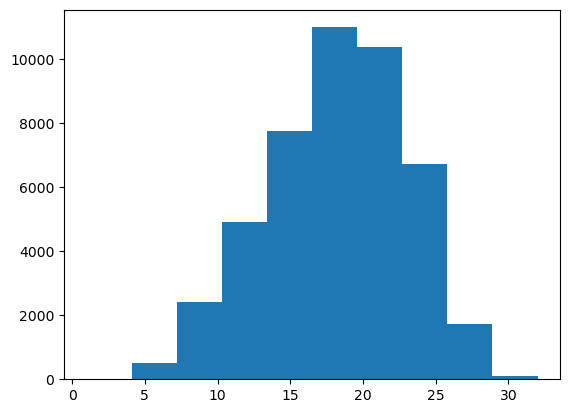

In [12]:
import matplotlib.pyplot as plt

rv_l = [len(doc) for doc in train_dataset['input_ids']]
print('Mean of the document length: {}'.format(np.mean(rv_l)))
print('Median of the document length: {}'.format(np.median(rv_l)))
print('Maximum document length: {}'.format(np.max(rv_l)))

plt.hist(rv_l)

We now neeed to choose a fixed sequence length, then *pad* the documents that are shorter than this maximum by adding a special token to the start of the sequence. The special pad token has an input value of 0. Any documents that exceed the length will be truncated.

**TO-DO 2a:** Complete the padding code below to insert 0s at the start of any sequences that are too short, and to truncate any sequences that are too long. **(3 marks)**

In [13]:
sequence_length = 40  # truncate all docs longer than this. Pad all docs shorter than this.

def pad_text(sample):
    input_ids = sample['input_ids']

    #if the input sequence is longer than the maximum length, truncate it
    if len(input_ids) > sequence_length:
        input_ids = input_ids[:sequence_length]
    
    #if the input sequence is shorter than the maximum length, pad it with 0s at the beginning
    if len(input_ids) < sequence_length:
        padding = [0] * (sequence_length - len(input_ids))
        input_ids = padding + input_ids
    
    #updating the 'input_ids' key-value pair in the sample with the padded/truncated sequence
    sample['input_ids'] = input_ids
    
    return sample

# The map method will call pad_text for every document in the dataset
train_dataset = train_dataset.map(pad_text)

0ex [00:00, ?ex/s]

We now have our data in almost the right format! To train a model using PyTorch, we are going to wrap our dataset in a [DataLoader object](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader). This allows the training process to select random subsets of the dataset -- mini-batches -- which it will use for learning with mini-batch stochastic gradient descent.

In [14]:
from torch.utils.data import DataLoader, TensorDataset

batch_size = 64

# convert from the Huggingface format to a TensorDataset so we can use the mini-batch sampling functionality
def convert_to_data_loader(dataset, num_classes):
    # convert from list to tensor
    input_tensor = torch.from_numpy(np.array(dataset['input_ids']))
    label_tensor = torch.from_numpy(np.array(dataset['label'])).long()
    tensor_dataset = TensorDataset(input_tensor, label_tensor)
    loader = DataLoader(tensor_dataset, batch_size=batch_size, shuffle=True)

    return loader

num_classes = len(np.unique(train_labels))   # number of possible labels in the sentiment analysis task

train_loader = convert_to_data_loader(train_dataset, num_classes)

Let's process the development and test set as well.

In [15]:
dev_dataset = dev_dataset.map(encode_text)
dev_dataset = dev_dataset.map(pad_text)
dev_loader = convert_to_data_loader(dev_dataset, num_classes)

test_dataset = test_dataset.map(encode_text)
test_dataset = test_dataset.map(pad_text)
test_loader = convert_to_data_loader(test_dataset, num_classes)

0ex [00:00, ?ex/s]

0ex [00:00, ?ex/s]

0ex [00:00, ?ex/s]

0ex [00:00, ?ex/s]

As shown in the diagram above, we will build a NN with three different layers for sentiment classification.

### Embedding layer
In the embedding layer, the network will create its own embeddings for the index with a given embedding dimension.
The module `nn.Embedding()` creates a simple lookup table that stores embeddings of a fixed dictionary and size.
This module is often used to store word embeddings and retrieve them using indices.
The module's input is a list of indices, and the output is the corresponding word embeddings.

[Documentation for Embedding Class](https://pytorch.org/docs/stable/generated/torch.nn.Embedding.html)

### Fully-connected layer
Fully-connected layers in a neural network are those layers where all the inputs from the previous layer are connected to every unit of the fully-connected layer. Here we will use fully-connected layers for the hidden layer and output layer. In Pytorch this kind of layer is implemented by the 'Linear' class:

https://pytorch.org/docs/stable/generated/torch.nn.Linear.html

## Activation functions
In Pytorch, the activation function is not included in the Linear class (or other kinds of neural network layer), so we need to explicitly connect each layer to an activation function.
In Pytorch, we construct a neural network by connecting up the output of each component to the input of the next, thereby creating a computation graph.
To complete the hidden layer, we connect the ouput of the linear layer to a ReLU activation function, thereby creating a nonlinear function.

The cell below defines a class for our neural text classifier. The constructor creates each of the layers and the activations. The dimensions of each layer need to be correct so that the output of one layer can be passed as input to the next, but the code is not yet complete.

Below the constructor is the forward method. This is called in the 'forward pass' to map the neural network's inputs to its outputs. In PyTorch, we pass data through each layer of the model, connecting them together, then returning the output of the final layer.

**TO-DO 2b** Complete the constructor and the forward method below for a NN with three layers. The places where you need to add code are marked in the cell below. Refer to the Pytorch documentation for additional help.  **(2 marks)**

In [16]:
from torch import nn

class FFTextClassifier(nn.Module):
    
    def __init__(self, vocab_size, sequence_length, embedding_size, hidden_size, num_classes):
        super(FFTextClassifier, self).__init__()

        self.embedding_size = embedding_size

        # Here we just need to construct the components of our network. We don't need to connect them together yet.
        self.embedding_layer = nn.Embedding(vocab_size, embedding_size) # embedding layer
        
        ### COMPLETE THE CODE HERE: WRITE IN THE MISSING ARGUMENTS SPECIFYING THE DIMENSIONS OF EACH LAYER
        self.hidden_layer = nn.Linear(sequence_length*embedding_size, hidden_size) # Fully connected hidden layer
        self.activation = nn.ReLU() # Hidden layer
        
        
        self.output_layer = nn.Linear(hidden_size, num_classes) # Fully connected output layer

        
        
    def forward (self, input_words):
        # Input dimensions are:  (batch_size, seq_length)
        embedded_words = self.embedding_layer(input_words)  # (batch_size, seq_length, embedding_size)

        # flatten the sequence of embedding vectors for each document into a single vector.
        embedded_words = embedded_words.reshape(embedded_words.shape[0], sequence_length*self.embedding_size)  # batch_size, seq_length*embedding_size

        z = self.hidden_layer(embedded_words)   # (batch_size, seq_length, hidden_size)
        
        h = self.activation(z)

        output = self.output_layer(h)                      # (batch_size, num_classes)

        # Notice we haven't applied a softmax activation to the output layer -- it's not required by Pytorch's loss function.

        return output

Now the class is complete. 

TO-DO 2c: In the next cell, create a NN with the FFTextClassifier class we wrote. (unmarked)

Hint: `ff_classifier_model = FFTextClassifier(...)`

In [17]:
vocab_size = len(vectorizer.vocabulary_) + 1
embedding_size = 10  # number of dimensions for embeddings
hidden_size = 8 # number of hidden units

###WRITE YOUR OWN CODE HERE

#creating a neural network with the FFTextClassifier from above
ff_classifier_model = FFTextClassifier(vocab_size, sequence_length, embedding_size, hidden_size, num_classes)


After desigining our network, we need to create a training function to calculate the loss for each input and perform backpropagation to optimise the network.
During training, the weights of all the layers will be updated.

Below, we build a training function to train the NN over a fixed number of epochs (an epoch is one iteration over the whole training dataset).
The function also prints the performance of both training and development/validation set after each epoch.

Here we use cross-entropy loss, which is the standard loss function for classification that we also used for logistic regression. The module `nn.CrossEntropyLoss()` operates directly on the output of our output layer, so we don't have to implement the softmax layer within the forward() method.

Cross Entropy Loss: https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html

The optimizer object implements a particular algorithm for updating the weights. Here, we will use the Adam optimizer, which is a variant of stochastic gradient descent method that tends to find a better solution in a smaller number of iterations than standard SGD.

Optimization: https://pytorch.org/docs/stable/optim.html

The cell below defines a training function for our classifier:

In [18]:
from torch import optim

def train_nn(num_epochs, model, train_dataloader, dev_dataloader):
    
    learning_rate = 0.0005  # learning rate for the gradient descent optimizer, related to the step size

    loss_fn = nn.CrossEntropyLoss()  # create loss function object
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)  # create the optimizer
    train_losses_epoch = []
    dev_losses_epoch = []
        
    for e in range(num_epochs):
        # Track performance on the training set as we are learning...
        total_correct = 0
        total_trained = 0
        train_losses = []
        

        model.train()  # Put the model in training mode.
        
        train_losses_epoch.append(np.mean(train_losses))
        dev_losses_epoch.append(np.mean(dev_losses))

        for i, (batch_input_ids, batch_labels) in enumerate(train_dataloader):
            # Iterate over each batch of data
            # print(f'batch no. = {i}')

            optimizer.zero_grad()  # Reset the optimizer

            # Use the model to perform forward inference on the input data.
            # This will run the forward() function.
            output = model(batch_input_ids)

            # Compute the loss for the current batch of data
            batch_loss = loss_fn(output, batch_labels)

            # Perform back propagation to compute the gradients with respect to each weight
            batch_loss.backward()

            # Update the weights using the compute gradients
            optimizer.step()

            # Record the loss from this sample to keep track of progress.
            train_losses.append(batch_loss.item())

            # Count correct labels so we can compute accuracy on the training set
            predicted_labels = output.argmax(1)
            total_correct += (predicted_labels == batch_labels).sum().item()
            total_trained += batch_labels.size(0)

        train_accuracy = total_correct/total_trained*100

        print("Epoch: {}/{}".format((e+1), num_epochs),
              "Training Loss: {:.4f}".format(np.mean(train_losses)),
              "Training Accuracy: {:.4f}%".format(train_accuracy))
        
        # Compute accuracy on dev set after this training epoch
        
        model.eval()  # Switch model to evaluation mode - turn off any random steps such as dropout
        total_correct = 0
        total_trained = 0
        dev_losses = []

        for dev_input_ids, dev_labels in dev_dataloader:
            dev_output = model(dev_input_ids)
            batch_loss = loss_fn(dev_output, dev_labels)
            dev_losses.append(batch_loss.item()) 
            
            # Count the number of correct predictions
            predicted_labels = dev_output.argmax(1)
            total_correct += (predicted_labels == dev_labels).sum().item()
            total_trained += dev_labels.size(0)
            
        dev_accuracy = total_correct/total_trained*100
        
        print("Epoch: {}/{}".format((e+1), num_epochs),
              "Validation Loss: {:.4f}".format(np.mean(dev_losses)),
              "Validation Accuracy: {:.4f}%".format(dev_accuracy))

    return model

In [19]:
def train_nn(num_epochs, model, train_dataloader, dev_dataloader):
    
    learning_rate = 0.0005  # learning rate for the gradient descent optimizer, related to the step size

    loss_fn = nn.CrossEntropyLoss()  # create loss function object
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)  # create the optimizer
    
    train_losses_epoch = []
    dev_losses_epoch = []
        
    for e in range(num_epochs):
        # Track performance on the training set as we are learning...
        total_correct = 0
        total_trained = 0
        train_losses = []

        model.train()  # Put the model in training mode.

        for i, (batch_input_ids, batch_labels) in enumerate(train_dataloader):
            optimizer.zero_grad()
            output = model(batch_input_ids)
            batch_loss = loss_fn(output, batch_labels)
            batch_loss.backward()
            optimizer.step()

            train_losses.append(batch_loss.item())

            predicted_labels = output.argmax(1)
            total_correct += (predicted_labels == batch_labels).sum().item()
            total_trained += batch_labels.size(0)

        train_accuracy = total_correct / total_trained * 100
        train_losses_epoch.append(np.mean(train_losses))

        print("Epoch: {}/{}".format((e+1), num_epochs),
              "Training Loss: {:.4f}".format(np.mean(train_losses)),
              "Training Accuracy: {:.4f}%".format(train_accuracy))
        
        # Compute accuracy on dev set after this training epoch
        
        model.eval()  # Switch model to evaluation mode - turn off any random steps such as dropout
        total_correct = 0
        total_trained = 0
        dev_losses = []

        for dev_input_ids, dev_labels in dev_dataloader:
            dev_output = model(dev_input_ids)
            batch_loss = loss_fn(dev_output, dev_labels)
            dev_losses.append(batch_loss.item()) 
            
            predicted_labels = dev_output.argmax(1)
            total_correct += (predicted_labels == dev_labels).sum().item()
            total_trained += dev_labels.size(0)
            
        dev_accuracy = total_correct / total_trained * 100
        dev_losses_epoch.append(np.mean(dev_losses))
        
        print("Epoch: {}/{}".format((e+1), num_epochs),
              "Validation Loss: {:.4f}".format(np.mean(dev_losses)),
              "Validation Accuracy: {:.4f}%".format(dev_accuracy))

    return model, train_losses_epoch, dev_losses_epoch


**TO-DO 2d:** Modify the training function above to return the training and development (or 'validation') losses at each epoch. Train the network for 15 epochs and plot the losses. Describe what the plot shows, and how you could use this information to improve the training process. **(8 marks)**

EXPLAIN YOUR ANSWER HERE


Epoch: 1/15 Training Loss: 1.0140 Training Accuracy: 44.6695%
Epoch: 1/15 Validation Loss: 1.0109 Validation Accuracy: 45.1000%
Epoch: 2/15 Training Loss: 0.9982 Training Accuracy: 47.7891%
Epoch: 2/15 Validation Loss: 1.0006 Validation Accuracy: 46.9000%
Epoch: 3/15 Training Loss: 0.9737 Training Accuracy: 51.0161%
Epoch: 3/15 Validation Loss: 0.9813 Validation Accuracy: 49.4500%
Epoch: 4/15 Training Loss: 0.9422 Training Accuracy: 53.6402%
Epoch: 4/15 Validation Loss: 0.9582 Validation Accuracy: 50.4000%
Epoch: 5/15 Training Loss: 0.9108 Training Accuracy: 56.0605%
Epoch: 5/15 Validation Loss: 0.9520 Validation Accuracy: 51.3000%
Epoch: 6/15 Training Loss: 0.8819 Training Accuracy: 57.8735%
Epoch: 6/15 Validation Loss: 0.9299 Validation Accuracy: 54.1000%
Epoch: 7/15 Training Loss: 0.8545 Training Accuracy: 59.5265%
Epoch: 7/15 Validation Loss: 0.9197 Validation Accuracy: 55.0000%
Epoch: 8/15 Training Loss: 0.8290 Training Accuracy: 61.0830%
Epoch: 8/15 Validation Loss: 0.9067 Valida

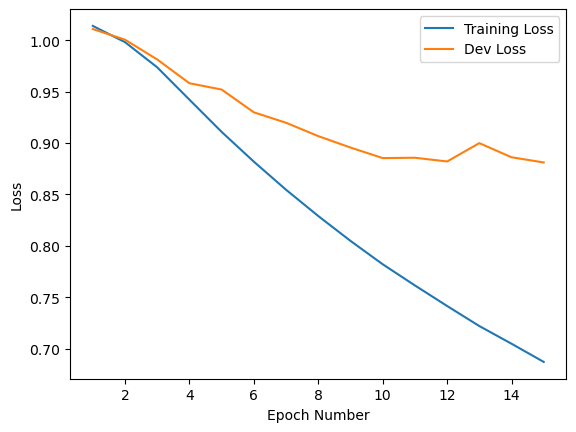

In [20]:
###WRITE YOUR OWN CODE HERE

#setting the number of epochs to 15 
num_epochs = 15

#initiliasing and instance of the FFTextClassifier class and training the model using the train_nn function
ff_classifier_model = FFTextClassifier(vocab_size, sequence_length, embedding_size, hidden_size, num_classes)
trained_model, train_losses, dev_losses = train_nn(num_epochs, ff_classifier_model, train_loader, dev_loader)

#plotting the training and validation losses over the epochs
plt.plot(range(1, num_epochs+1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs+1), dev_losses, label='Dev Loss')
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.legend()
plt.show()



The code below obtains predictions from our neural network:

In [21]:
def predict_nn(trained_model, test_loader):

    trained_model.eval()  # switch off some randomisation used during training (dropout) to give consistent predictions

    correct = 0  # count the number of correct classification labels

    gold_labs = []  # gold labels to return
    pred_labs = []  # predicted labels to return
    
    for inputs, labels in test_loader:
        test_output = trained_model(inputs)  # run the forward() function on the inputs
        predicted_labels = test_output.argmax(1)  # select the class labels with highest logits as our predictions

        gold_labs.extend(labels.tolist())
        pred_labs.extend(predicted_labels.tolist())
    
    return gold_labs, pred_labs

gold_labs, pred_labs = predict_nn(trained_model, test_loader)

Now, we can use pretrained word embeddings instead of learning them from scratch during training.
Here, we will use the pretrained GloVe embeddings that we loaded before. The embedding matrix is used to initialise the embedding layer. The code below converts the GloVe embeddings into an embedding matrix suitable for PyTorch:

In [22]:
embedding_matrix = torch.zeros((vocab_size, glove_wv.vector_size))
for word in vocab:
    word_idx = vocab[word]
    if word in glove_wv:
        embedding_matrix[word_idx, :] = torch.from_numpy(glove_wv[word])
        
print(embedding_matrix)

/var/folders/gj/hw1cdj5x7bb_klmnn8kzz_rc0000gn/T/ipykernel_12879/225966899.py:5: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1678402353079/work/torch/csrc/utils/tensor_numpy.cpp:212.)
  embedding_matrix[word_idx, :] = torch.from_numpy(glove_wv[word])


tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [-0.3535,  0.0987,  0.1718,  ...,  0.4630,  1.3101,  1.1314],
        [-0.4106,  0.1487,  0.0637,  ...,  0.6097,  1.0935,  0.9614],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]])


The class below extends the FFTextClassifier class (it's incomplete for now -- you'll fix this in a minute!). This means that it inherits all of its functionality, but we overwrite the constructor (the `__init__` method). This way, we don't need to define the forward function again, as it will be the same as before.

The embedding layer is now different as it loads pretrained embeddings from our matrix. The argument `freeze` determines whether the embeddings remain fixed to their pretrained values (if `freeze=True`) or are updated through backpropagation to fit them to the dataset.

In [23]:
class FFTextClassifierWithEmbeddings(FFTextClassifier):

    def __init__(self, hidden_size, sequence_length, num_classes, embedding_matrix):
        super(FFTextClassifier, self).__init__()

        self.embedding_size = embedding_matrix.shape[1] 

        # Here we just need to construct the components of our network. We don't need to connect them together yet.
        self.embedding_layer = nn.Embedding.from_pretrained(embedding_matrix, freeze=True) # embedding layer

        ### COMPLETE THE ARGUMENTS TO SPECIFY THE DIMENSIONS OF THE LAYERS
        self.hidden_layer = nn.Linear(sequence_length * self.embedding_size, hidden_size) # Hidden layer
        self.activation = nn.ReLU() # Hidden layer activation
        self.output_layer = nn.Linear(hidden_size, num_classes) # Fully connected layer

**TO-DO 2e:** Complete the arguments in the `FFTextClassifierWithEmbeddings` constructor to set the dimensions of the neural network layers.  Repeat the experiment above using the FFTextClassifierWithEmbeddings with the GLoVe embeddings. Choose a suitable performance metric and compare the performance of the two neural text classifiers. Explain in one or two sentences the possible reason(s) for any performance differences you observe. **(3 marks)**

WRITE YOUR ANSWER HERE:

In [24]:
### WRITE YOUR OWN CODE BELOW
# Create an instance of the FFTextClassifierWithEmbeddings class
ff_classifier_with_embeddings = FFTextClassifierWithEmbeddings(hidden_size, sequence_length, num_classes, embedding_matrix)

# Train the model
num_epochs = 15

trained_model_with_embeddings, train_losses_with_embeddings, dev_losses_with_embeddings = train_nn(num_epochs, ff_classifier_with_embeddings, train_loader, dev_loader)

# Test the model
gold_labs_embed, pred_labs_embed = predict_nn(trained_model_with_embeddings, test_loader)

# Importing Performance metrics
from sklearn.metrics import accuracy_score, f1_score

# Original FFTextClassifier performance
accuracy = accuracy_score(gold_labs, pred_labs)
f1 = f1_score(gold_labs, pred_labs, average='weighted')

# FFTextClassifierWithEmbeddings performance
accuracy_embed = accuracy_score(gold_labs_embed, pred_labs_embed)
f1_embed = f1_score(gold_labs_embed, pred_labs_embed, average='weighted')

print("Original Model Performance:")
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("F1 Score: {:.4f}".format(f1))

print("\nModel with GLoVe Embeddings Performance:")
print("Accuracy: {:.2f}%".format(accuracy_embed * 100))
print("F1 Score: {:.4f}".format(f1_embed))



Epoch: 1/15 Training Loss: 1.0103 Training Accuracy: 46.7127%
Epoch: 1/15 Validation Loss: 0.9985 Validation Accuracy: 48.2000%
Epoch: 2/15 Training Loss: 0.9785 Training Accuracy: 49.2426%
Epoch: 2/15 Validation Loss: 0.9924 Validation Accuracy: 46.7000%
Epoch: 3/15 Training Loss: 0.9650 Training Accuracy: 50.2401%
Epoch: 3/15 Validation Loss: 0.9876 Validation Accuracy: 47.3000%
Epoch: 4/15 Training Loss: 0.9572 Training Accuracy: 50.9043%
Epoch: 4/15 Validation Loss: 0.9949 Validation Accuracy: 47.1000%
Epoch: 5/15 Training Loss: 0.9513 Training Accuracy: 51.6321%
Epoch: 5/15 Validation Loss: 0.9907 Validation Accuracy: 47.4500%
Epoch: 6/15 Training Loss: 0.9462 Training Accuracy: 51.9807%
Epoch: 6/15 Validation Loss: 0.9896 Validation Accuracy: 46.4000%
Epoch: 7/15 Training Loss: 0.9416 Training Accuracy: 52.3709%
Epoch: 7/15 Validation Loss: 1.0018 Validation Accuracy: 46.8500%
Epoch: 8/15 Training Loss: 0.9378 Training Accuracy: 52.7524%
Epoch: 8/15 Validation Loss: 1.0040 Valida

# 3. Improving the Neural Text Classifier (max. 22 marks)

This section allows you some more free reign to experiment with the neural text classifier. Below, we list several to-dos that you can solve in your own way. Please make sure to label your notebook cells clearly so that it is obvious which to-do each cell corresponds to.

**TO-DO 3a:** Consider the neural text classifiers we have just implemented and the results you obtained in the last to-do. The classifiers have a number of limitations that we could improve. Describe three limitations and how you could improve them. For each improvement you propose, provide a brief explanation (up to 1 paragraph) of how it works. 

Hint: refer to the lectures for some ideas. **(9 marks)**

WRITE YOUR ANSWER HERE:

One limitation of the neural neural text classifiers is that they may encounter words in the test or validation data that were not present in the training data, resulting in OOV words. To improve this, we can use subword tokenisation techniques like Byte-Pair Encoding (BPE) or WordPiece tokenisation. These techniques break words into subword units and allow the model to handle OOV words by composing them from known subwords. This helps in capturing the meaning of new or rare words that were not present in the training data.

Another limitation is the potential for overfitting to the training data, therefore performing bad on unseen data. This can be addressed by applying regularisation techniques such as dropout or weight decay. Dropout randomly sets a fraction of the activations to zero during training, which helps in preventing the model from relying too heavily on specific features or relationships in the training data. Weight decay adds a penalty term to the loss function, discouraging large weights and promoting a simpler model.

Finally, another limitation is the variability and instablility of the neural text classifiers, that can promote biases or weaknesses. To address this, we can use ensemble methods, where we can train multiple neural text classifiers with different architectures or random initialisations and combine their predictions. This can help in reducing model bias and variance, leading to improved performance. Ensemble methods also provide better model uncertainty estimation by considering the diversity of prediction from different models. 


---

**TO-DO 3b:** Implement your improvements and compute the performance of your method. Make sure to comment your code to show where each new step is implemented. Use the validation set for any tuning you decide to do. Present your results clearly. **(13 marks)**

In [25]:
# Importing pretrained tokenizer from Transformers package
from transformers import DistilBertTokenizer, DistilBertModel

# Handling OOV Words
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

# Tokenize and encode the text using the tokenizer
train_encoded = train_dataset.map(lambda sample: {'input_ids': tokenizer.encode(sample['text'], truncation=True, padding='max_length', max_length=sequence_length), 'label': sample['label']})
dev_encoded = dev_dataset.map(lambda sample: {'input_ids': tokenizer.encode(sample['text'], truncation=True, padding='max_length', max_length=sequence_length), 'label': sample['label']})

# Update the vocab size based on the tokenizer
vocab_size = len(tokenizer)



0ex [00:00, ?ex/s]

0ex [00:00, ?ex/s]

Here I am addressing the first limitation by using a subword tokenisation technique provided by the transformers library. This replaces the CountVectorizer for encoding the text. I have used a pre-trained tokeniser and tokenised the text into subwords. The vocabulary size of the modelwill be adjusted accordingly based on the tokeniser. 

In [26]:
from torch import nn

class FFTextClassifier(nn.Module):
    
    def __init__(self, vocab_size, sequence_length, embedding_size, hidden_size, num_classes):
        super(FFTextClassifier, self).__init__()

        self.embedding_size = embedding_size

        # Here we just need to construct the components of our network. We don't need to connect them together yet.
        self.embedding_layer = nn.Embedding(vocab_size, embedding_size) # embedding layer
        
        ### COMPLETE THE CODE HERE: WRITE IN THE MISSING ARGUMENTS SPECIFYING THE DIMENSIONS OF EACH LAYER
        self.hidden_layer = nn.Linear(sequence_length*embedding_size, hidden_size) # Fully connected hidden layer
        self.activation = nn.ReLU() # Hidden layer
        
        self.output_layer = nn.Linear(hidden_size, num_classes) # Fully connected output layer

        self.dropout = nn.Dropout(0.2) # Dropout layer with 20% dropout rate
        
    def forward (self, input_words):
        # Input dimensions are:  (batch_size, seq_length)
        embedded_words = self.embedding_layer(input_words)  # (batch_size, seq_length, embedding_size)

        # flatten the sequence of embedding vectors for each document into a single vector.
        embedded_words = embedded_words.reshape(embedded_words.shape[0], sequence_length*self.embedding_size)  # batch_size, seq_length*embedding_size

        z = self.hidden_layer(embedded_words)   # (batch_size, seq_length, hidden_size)
        z = self.dropout(self.hidden_layer(embedded_words)) #applying dropout to the hidden layer output
        
        h = self.activation(z)

        output = self.output_layer(h)                      # (batch_size, num_classes)

        # Notice we haven't applied a softmax activation to the output layer -- it's not required by Pytorch's loss function.

        return output

In this code I am addressing the second limitation by adding model regularisation through using dropout. I have added dropout regularisation to the hidden layer of the neural network which can help prevent overfitting and improve generalisation of the model.

In [28]:
#defining a function that evaluates the performance of the ensemble methods on the validation set
def run_ensemble(models, val_loader):
    total_correct = 0
    total_samples = 0

    for val_input_ids, val_labels in val_loader:
        output = ensemble_predict(models, val_input_ids)
        predicted_labels = output.argmax(1)
        total_correct += (predicted_labels == val_labels).sum().item()
        total_samples += val_labels.size(0)

    val_accuracy = total_correct / total_samples * 100

    print("Validation Accuracy: {:.4f}%".format(val_accuracy))

# Model Ensemble
num_models = 5
models = []
for _ in range(num_models):
    model = FFTextClassifier(vocab_size, sequence_length, embedding_size, hidden_size, num_classes)
    trained_model = train_nn(num_epochs, model, train_encoded, dev_encoded)
    models.append(trained_model)

# Call the ensemble function to compute the performance on the validation dataset
val_encoded = dev_dataset.map(lambda sample: {'input_ids': tokenizer.encode(sample['text'], truncation=True, padding='max_length', max_length=sequence_length), 'label': sample['label']})
val_loader = convert_to_data_loader(val_encoded, num_classes)

run_ensemble(models, val_loader)



ValueError: too many values to unpack (expected 2)

Here I have made an attempt to address my third and final limitation of variability and instability in the neural text classifier. I have made an attempt to try and train multiple text classifiers with diffrent random initialisations and combining their predictions by averaging the output probabilities. This is much harder to implement compared to the other improvements as it requires changing a lot more of the previous code.